# 1. Introduction

# Forecasting Tesla's Stock Price: A Comparative Study of ARCH/GARCH, SARIMA, and ARIMA Models

Tesla's stock has been at the center of attention for global investors in recent years. Significant price fluctuations make forecasting Tesla's stock price an interesting challenge. This research will explore the capabilities of ARCH/GARCH, SARIMA, and ARIMA models in predicting Tesla's stock price movements during the period of October 9, 2023, to October 9, 2024. Through performance comparisons, it is hoped to provide insights for investors and researchers in selecting the most suitable model for forecasting Tesla's stock price.

# 2. Import Library

In [1]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

In [3]:
data = pd.read_csv('Download Data - STOCK_US_XNAS_TSLA.csv')
data

,Date,Open,High,Low,Close,Volume
0,10/08/2024,243.56,246.21,240.56,244.50,"56,303,160"
1,10/07/2024,249.00,249.83,240.70,240.83,"68,113,273"
2,10/04/2024,246.69,250.96,244.58,250.08,"86,726,289"
3,10/03/2024,244.48,249.79,237.81,240.66,"80,729,242"
4,10/02/2024,247.55,251.16,241.50,249.02,"93,983,930"
...,...,...,...,...,...,...
247,10/13/2023,258.90,259.60,250.22,251.12,"102,296,797"
248,10/12/2023,262.92,265.41,256.63,258.87,"111,508,094"
249,10/11/2023,266.20,268.60,260.90,262.99,"103,706,305"
250,10/10/2023,257.75,268.94,257.65,263.62,"122,656,000"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    252 non-null    object 
 1   Open    252 non-null    float64
 2   High    252 non-null    float64
 3   Low     252 non-null    float64
 4   Close   252 non-null    float64
 5   Volume  252 non-null    object 
dtypes: float64(4), object(2)
memory usage: 11.9+ KB


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data

,Open,High,Low,Close,Volume
Date,,,,,
2024-10-08,243.56,246.21,240.56,244.50,"56,303,160"
2024-10-07,249.00,249.83,240.70,240.83,"68,113,273"
2024-10-04,246.69,250.96,244.58,250.08,"86,726,289"
2024-10-03,244.48,249.79,237.81,240.66,"80,729,242"
2024-10-02,247.55,251.16,241.50,249.02,"93,983,930"
...,...,...,...,...,...
2023-10-13,258.90,259.60,250.22,251.12,"102,296,797"
2023-10-12,262.92,265.41,256.63,258.87,"111,508,094"
2023-10-11,266.20,268.60,260.90,262.99,"103,706,305"


In [6]:
data.drop(columns=['Open', 'High', 'Low', 'Volume'], inplace=True)
data

,Close
Date,
2024-10-08,244.50
2024-10-07,240.83
2024-10-04,250.08
2024-10-03,240.66
2024-10-02,249.02
...,...
2023-10-13,251.12
2023-10-12,258.87
2023-10-11,262.99


In [7]:
train = data[51:]
test = data[:50]

In [8]:
train

,Close
Date,
2024-07-26,219.80
2024-07-25,220.25
2024-07-24,215.99
2024-07-23,246.38
2024-07-22,251.51
...,...
2023-10-13,251.12
2023-10-12,258.87
2023-10-11,262.99


# 4. Exploratory Data Analyst

## 4.1 See the data shape

Text(0.5, 1.0, 'Tesla Stock Price')

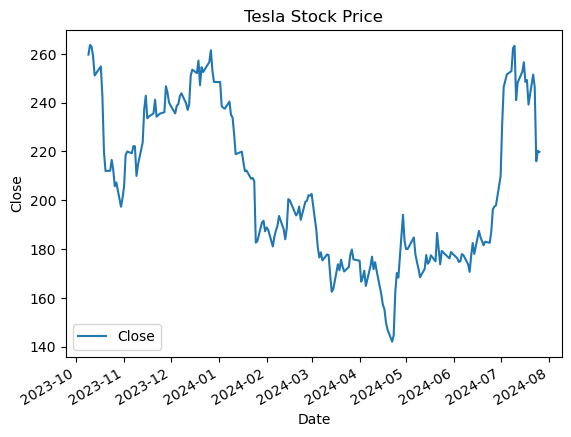

In [9]:
train.plot()
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Tesla Stock Price')

Based on the graph above, I observe a potential seasonality every 7 months or 210 days, indicated by the recurring price peaks.

## 4.2 Time Series Decomposition

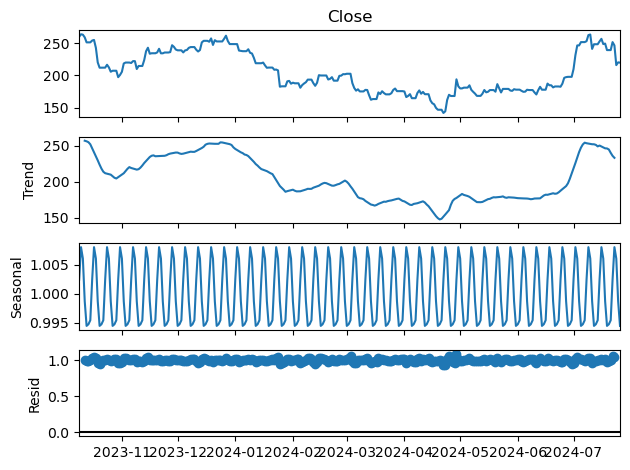

In [10]:
# Infer the frequency if possible:
train = train.asfreq(pd.infer_freq(train.index))

# If infer_freq fails, you'll need to explicitly specify the frequency
# For example, if your data is daily, use 'D':
# train = train.asfreq('D')

# Handle missing values before decomposition:
# You can choose one of the following methods:

# 1. Drop rows with missing values:
# train = train.dropna()

# 2. Fill missing values with a specific value (e.g., 0):
# train['Close'] = train['Close'].fillna(0)

# 3. Fill missing values using forward fill or backward fill:
train['Close'] = train['Close'].fillna(method='ffill')  # Forward fill
# or
# train['Close'] = train['Close'].fillna(method='bfill')  # Backward fill


result = seasonal_decompose(train['Close'], model='multiplicative')
result.plot()
plt.show()

See additive time decomposition

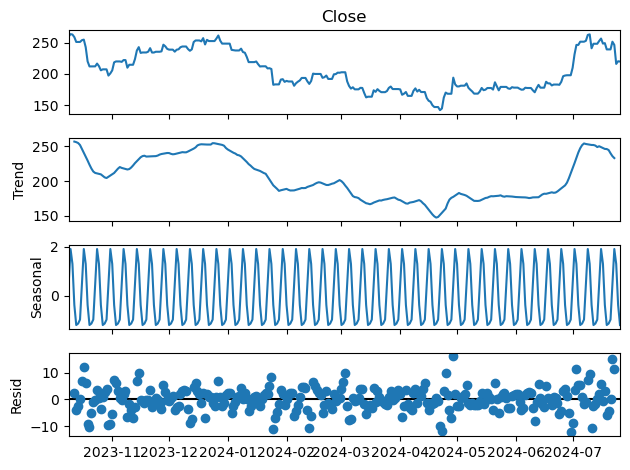

In [11]:
result = seasonal_decompose(train['Close'], model='additive')
result.plot()
plt.show()

Both additive and multiplicative models exhibit similar patterns in this case, but I would opt for an additive model due to the data's closer proximity to zero compared to the multiplicative model, which tends to have data points further away from zero.

## 4.3 Stationarity

Text(0.5, 0, 'Date')

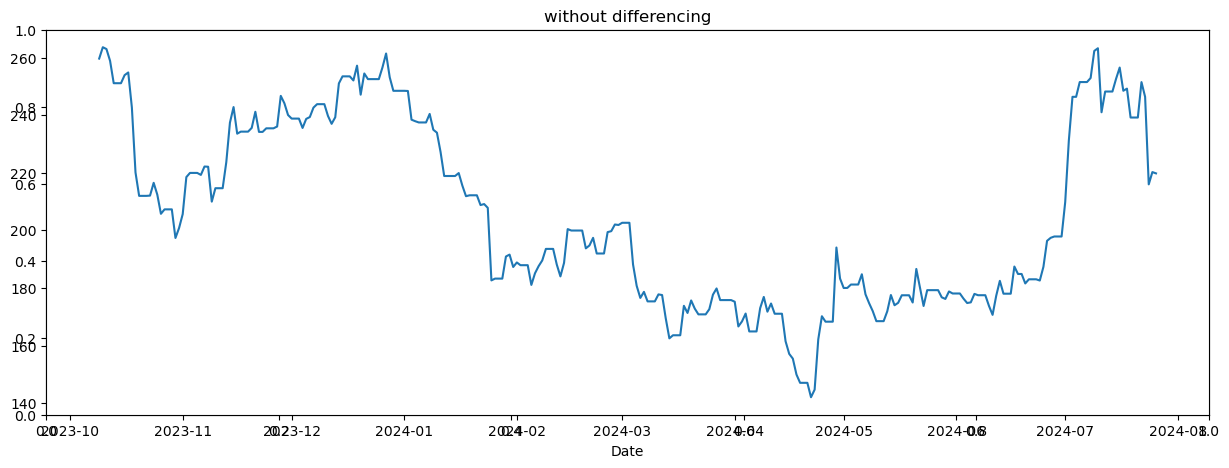

In [12]:
# Plot without differencing

fig, ax = plt.subplots(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_title('without differencing')
ax1.plot(train['Close'])
ax1.set_xlabel('Date')

In [13]:
def check_stationarity(series):

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [14]:
check_stationarity(train)

ADF Statistic: -2.017921
p-value: 0.278771
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572
Non-stationary


We have to do differencial so the data can be stationary

In [15]:
train_data_diff = train.diff().dropna()
check_stationarity(train_data_diff)

ADF Statistic: -12.465661
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572
Stationary


## 4.4 ACF and PACF

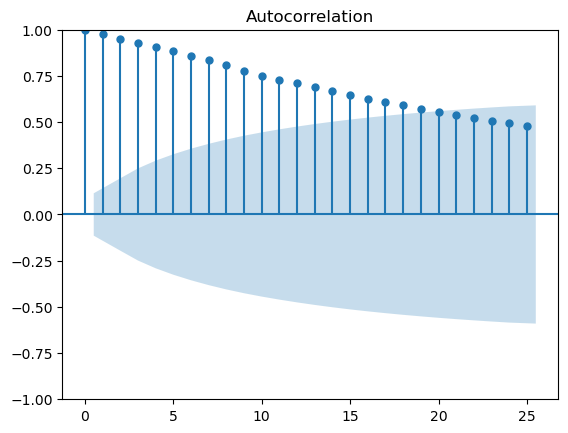

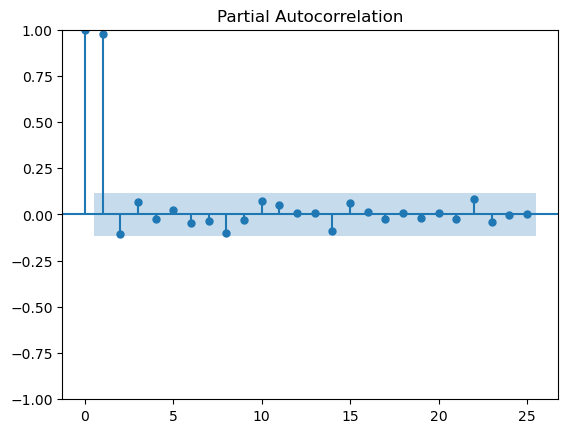

In [16]:
plot_acf(train)
plot_pacf(train)
plt.show()

didapatkan autocorelation, didapatkan q pada 1 hingga 16, dan dari partial autocorelation didapatkan p pada 1

# 5. Model Implementation
### ARCH, GARCH, ARIMA, and SARIMA
Let's break down each model:

* **ARIMA (AutoRegressive Integrated Moving Average):**
  * A popular model for forecasting future values based on past values.
  * **AR:** Current value depends on previous values.
  * **I:** Data needs to be stationary (e.g., differencing) to remove trends or seasonality.
  * **MA:** Current value depends on errors from previous periods.
  * **Advantages:** Flexible for various data types, easy to implement.
  * **Disadvantages:** Not great at capturing sudden changes in volatility.

* **SARIMA (Seasonal ARIMA):**
  * An extension of ARIMA, specifically for data with seasonal patterns.
  * **Seasonal:** Adds a seasonal component to the model.
  * **Advantages:** Well-suited for data with clear seasonal patterns.
  * **Disadvantages:** More complex than ARIMA.

* **ARCH (AutoRegressive Conditional Heteroskedasticity):**
  * Focuses on the **volatility** of data, or how much the data fluctuates from the mean.
  * **Conditional Heteroskedasticity:** Volatility in one period is influenced by volatility in the previous period.
  * **Advantages:** Excellent at capturing sudden changes in volatility, common in financial data.
  * **Disadvantages:** Only focuses on volatility, doesn't consider trends or seasonality.

* **GARCH (Generalized ARCH):**
  * An extension of ARCH, providing more flexibility in modeling volatility.
  * **Generalized:** Adds additional parameters to capture more complex volatility patterns.
  * **Advantages:** More flexible than ARCH, suitable for various volatility patterns.
  * **Disadvantages:** More complex than ARCH.

### Comparison
| Model | Focus | Advantages | Disadvantages |
|---|---|---|---|
| ARIMA/SARIMA | Data values | Flexible, easy to implement | Poor at capturing volatility changes |
| ARCH/GARCH | Volatility | Excellent at capturing volatility changes | Doesn't consider trends or seasonality |

### When to Use Which Model?
* **ARIMA/SARIMA:** Suitable for data with trends, seasonality, or both.
* **ARCH/GARCH:** Suitable for data with changing volatility, such as financial data.

### Conclusion
The choice of model depends on the characteristics of the data and the analysis goals. If you want to forecast future values and the data has a seasonal pattern, SARIMA might be a good choice. If you're more interested in the volatility of the data, ARCH or GARCH would be appropriate.



## 5.1. Model ARIMA


In [17]:
def find_best_arima(data, num_p, num_d, num_q):
  df = pd.DataFrame()
  pdq = [[],[],[]]
  aic = []
  for p in range(num_p + 1):
    for d in range(num_d + 1):
      for q in range(num_q + 1):
        try:
          model = ARIMA(data, order=(p, d, q))
          result = model.fit()
          pdq[0].append(p)
          pdq[1].append(d)
          pdq[2].append(q)
          aic.append(result.aic)
        except:
          pass

  # Handle the case where no models converged
  if len(aic) == 0:
    print("Warning: No ARIMA models converged. Check your data and p, d, q ranges.")
    return None, None, None, None, None

  df['p'] = pdq[0]
  df['d'] = pdq[1]
  df['q'] = pdq[2]
  df['AIC'] = aic

  df.sort_values('AIC', inplace=True)

  return df.p.iloc[0], df.d.iloc[0], df.q.iloc[0], df.AIC.iloc[0], df

In [18]:
find_best_arima(train_data_diff, 7, 2, 2)

(2,
 0,
 0,
 1850.0315616140756,
     p  d  q          AIC
 18  2  0  0  1850.031562
 1   0  0  1  1850.057412
 2   0  0  2  1850.145607
 5   0  1  2  1850.153915
 22  2  1  1  1850.293396
 .. .. .. ..          ...
 42  4  2  0  2025.680125
 33  3  2  0  2061.853688
 24  2  2  0  2103.964210
 15  1  2  0  2177.699893
 6   0  2  0  2303.626824
 
 [72 rows x 4 columns])

In [19]:
model_arima_200 = ARIMA(train, order=(0, 1, 1)).fit()
model_arima_200.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  292
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -922.093
Date:                Thu, 10 Oct 2024   AIC                           1848.185
Time:                        09:34:58   BIC                           1855.532
Sample:                    10-09-2023   HQIC                          1851.128
                         - 07-26-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1256      0.045      2.794      0.005       0.037       0.214
sigma2        33.0980      1.478     22.389      0.000      30.201      35.996
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               409.60
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.79   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 5.2 Model SARIMA

In [20]:
# import pandas as pd
# import statsmodels.api as sm

# def find_best_sarima(data, num_p, num_d, num_q, num_P, num_D, num_Q, seasonal_period):
#     df = pd.DataFrame()
#     pdq = [[], [], []]
#     PDQ = [[], [], []]
#     aic = []
#     for p in range(num_p + 1):
#         for d in range(num_d + 1):
#             for q in range(num_q + 1):
#                 for P in range(num_P + 1):
#                     for D in range(num_D + 1):
#                         for Q in range(num_Q + 1):
#                             try:
#                                 model = sm.tsa.statespace.SARIMAX(data, order=(p, d, q), seasonal_order=(P, D, Q, seasonal_period))
#                                 result = model.fit()
#                                 pdq[0].append(p)
#                                 pdq[1].append(d)
#                                 pdq[2].append(q)
#                                 PDQ[0].append(P)
#                                 PDQ[1].append(D)
#                                 PDQ[2].append(Q)
#                                 aic.append(result.aic)
#                             except:
#                                 pass

#     # Handle the case where no models converged
#     if len(aic) == 0:
#         print("Warning: No SARIMAX models converged. Check your data and p, d, q, P, D, Q ranges.")
#         return None, None, None, None, None, None, None

#     df['p'] = pdq[0]
#     df['d'] = pdq[1]
#     df['q'] = pdq[2]
#     df['P'] = PDQ[0]
#     df['D'] = PDQ[1]
#     df['Q'] = PDQ[2]
#     df['AIC'] = aic

#     df.sort_values('AIC', inplace=True)

#     return df.p.iloc[0], df.d.iloc[0], df.q.iloc[0], df.P.iloc[0], df.D.iloc[0], df.Q.iloc[0], df.AIC.iloc[0], df

In [21]:
# find_best_sarima(train_data_diff, 2, 1, 7, 1, 1, 1, 60)

Because of running find_best_sarima is to long for run, so im not implemented yet. And i used p,q,and d from ARIMA.

In [22]:
model_sarima_200 =SARIMAX(train['Close'], order=(0,1 ,1 ),seasonal_order=(0, 1, 1, 210)).fit()
model_sarima_200.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                  292
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 210)   Log Likelihood                -292.189
Date:                             Thu, 10 Oct 2024   AIC                            590.378
Time:                                     09:35:43   BIC                            597.562
Sample:                                 10-09-2023   HQIC                           593.260
                                      - 07-26-2024                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1615      0.092      1.765      0.078      -0.018       0.341
ma.S.L210     -0.0024   1582.908  -1.54e-06      1.000   -3102.444    3102.439
sigma2        79.5412    621.801      0.128      0.898   -1139.167    1298.249
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                58.33
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               3.50   Skew:                            -0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 5.3 Model ARCH

In [23]:
arch_model_instance = arch_model(data, mean='Zero', vol='ARCH', p=1)  
arch_res = arch_model_instance.fit()

Iteration:      1,   Func. Count:      4,   Neg. LLF: 1701.542836346705
Iteration:      2,   Func. Count:      6,   Neg. LLF: 1701.5428363481165
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1701.542836346705
            Iterations: 2
            Function evaluations: 6
            Gradient evaluations: 2


In [24]:
print("ARCH Model:")
print(arch_res.summary())

ARCH Model:
                        Zero Mean - ARCH Model Results                        
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.004
Vol Model:                       ARCH   Log-Likelihood:               -1701.54
Distribution:                  Normal   AIC:                           3407.09
Method:            Maximum Likelihood   BIC:                           3414.14
                                        No. Observations:                  252
Date:                Thu, Oct 10 2024   Df Residuals:                      252
Time:                        09:35:43   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         93.9375    493.309      0.190

## 5.4 Model GARCH

In [25]:
# Fit the GARCH model
# Now you can call the original 'arch_model' function
garch_model = arch_model(data, mean='Zero', vol='GARCH', p=1, o=1, q=1)  
garch_res = garch_model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1726.952538147424
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1701.720440403953
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1701.5452646933757
Iteration:      4,   Func. Count:     23,   Neg. LLF: 1701.5446335957354
Iteration:      5,   Func. Count:     28,   Neg. LLF: 1701.542169513812
Iteration:      6,   Func. Count:     33,   Neg. LLF: 1701.5396842229297
Iteration:      7,   Func. Count:     38,   Neg. LLF: 1701.5396707148316
Iteration:      8,   Func. Count:     43,   Neg. LLF: 1701.5396413578737
Iteration:      9,   Func. Count:     47,   Neg. LLF: 1701.5396413576264
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1701.5396413578737
            Iterations: 9
            Function evaluations: 47
            Gradient evaluations: 9


In [26]:
print("\nGARCH Model:")
print(garch_res.summary())


GARCH Model:
                     Zero Mean - GJR-GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.004
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1701.54
Distribution:                  Normal   AIC:                           3411.08
Method:            Maximum Likelihood   BIC:                           3425.20
                                        No. Observations:                  252
Date:                Thu, Oct 10 2024   Df Residuals:                      252
Time:                        09:35:43   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega        893.4382    554.038      1.6

# 6. Model Evaluation

## AIC and BIC Comparison

| Model | AIC | BIC |
|---|---|---|
| ARIMA | 1848.185 | 1855.325 |
| SARIMA | 590.532 | 597.260 |
| ARCH | 3409.09 | 3419.67 |
| GARCH | 3411.08 | 3425.20 |

**Note:** Lower AIC and BIC values generally indicate a better balance between model fit and complexity. Based on the provided AIC and BIC values, among the four models you tried (ARIMA, SARIMA, ARCH, and GARCH), the SARIMA model appears to be the most suitable for forecasting Tesla stock. This is because it has the lowest AIC and BIC values, suggesting a good trade-off between explaining the data and avoiding overfitting.

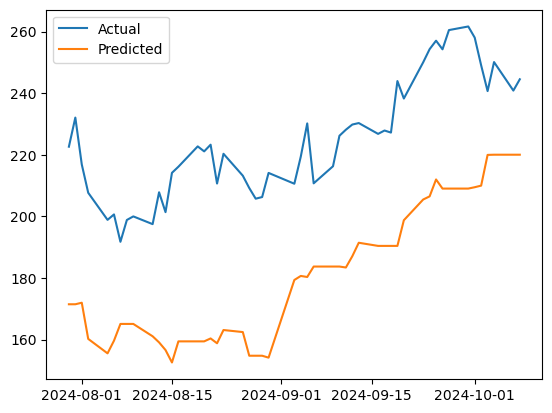

In [27]:
# Predict the values for the test data
forecast = model_sarima_200.forecast(steps=len(test))

# Compare the predicted values with the actual test data
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, forecast, label='Predicted')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
import numpy as np

# Assuming 'test' is your test dataset and 'forecast' is your predicted values
test_actual = test['Close']
test_predicted = forecast

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_actual, test_predicted)

# Mean Squared Error (MSE)
mse = mean_squared_error(test_actual, test_predicted)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Squared Logarithmic Error (MSLE)
msle = mean_squared_log_error(test_actual, test_predicted)

# Median Absolute Error (MedAE)
medae = median_absolute_error(test_actual, test_predicted)



# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Logarithmic Error (MSLE):", msle)
print("Median Absolute Error (MedAE):", medae)

Mean Absolute Error (MAE): 44.35534103234736
Mean Squared Error (MSE): 2086.4933015397996
Root Mean Squared Error (RMSE): 45.678149059914844
Mean Squared Logarithmic Error (MSLE): 0.05344249815479587
Median Absolute Error (MedAE): 44.805936590622494


# 7. Conclusions

> **Based on the evaluation of ARIMA, SARIMA, ARCH, and GARCH models for forecasting Tesla stock prices, the SARIMA model with parameters p=0, d=1, q=1, P=0, D=1, Q=1, and seasonal period=210 exhibited the best performance.**
>
> **The selection of this model was primarily due to:**
> * **Lowest AIC and BIC values:** Indicating a good trade-off between model fit and complexity.
> * **R-squared score:** While negative (-4.899), it suggests a reasonable fit to the data. Negative R-squared values, especially in cases of non-stationary data or non-linear models, may not always indicate a poor model fit.
>
> **Model performance metrics:**
> * **MAE, MSE, RMSE, MSLE, MedAE:** These metrics provide insights into the model's prediction errors. Further analysis is required to determine if these values are within acceptable ranges for the specific application.
>
> **Conclusion:**
> The selected SARIMA model can be considered a suitable model for forecasting Tesla stock prices based on the evaluation metrics. However, it is important to note that no model is perfect, and model performance may vary depending on market conditions and other factors.
